In [ ]:
""" 
Analysis of copy strategy 13 (written for 13.1 but applies to all 13 I think)

Also looking at "replay" version of code to make sure all infor is there to
plot.

Key querstion is whether evidence of rcopying, in the dots task.
[OBSOLETE - use 082620 - modify the flag therin]

"""

In [1]:
%load_ext autoreload
%autoreload 2

%cd ..

/data1/code/python/drawmonkey


In [2]:
from tools.utils import * 
from tools.plots import *
from tools.analy import *
from tools.calc import *
from tools.analyplot import *
from pythonlib.drawmodel.analysis import *
from pythonlib.tools.stroketools import *

NOTE: need to not overwrite strokes_all_task, because then the orders saved will stop being accurate. Modify


In [3]:
animal = "Red"
date = 200817
expt = "pilot"
session = 1

from tools.preprocess import *
fd = loadSingleData(animal, date, expt, session, resave_as_dict=False, load_resaved_data=True, 
                      resave_overwrite=False)

found one matching filename: ['/data2/animals/Red/200817/200817_152638_pilot_Red_1.h5']
found one matching filename: ['/data2/animals/Red/200817/200817_152638_pilot_Red_1.pkl']
-- loaded presaved data: /data2/animals/Red/200817/200817_152638_pilot_Red_1.pkl


# (1) Does score incresae over bloques, for bloques, where fade is complete?
I think that fade of 0.03 or less is probably complete, based on behavior.

In [4]:

############ START HERE
import seaborn as sns

# === get dataframe, including block categories
df = extractSessionDf(fd)
yplot = "hausdorff"
# yplot = "behscore"


got 531 total trials
I think this means there is only one blaock...


Text(0.5, 1.0, 'zoomed in')

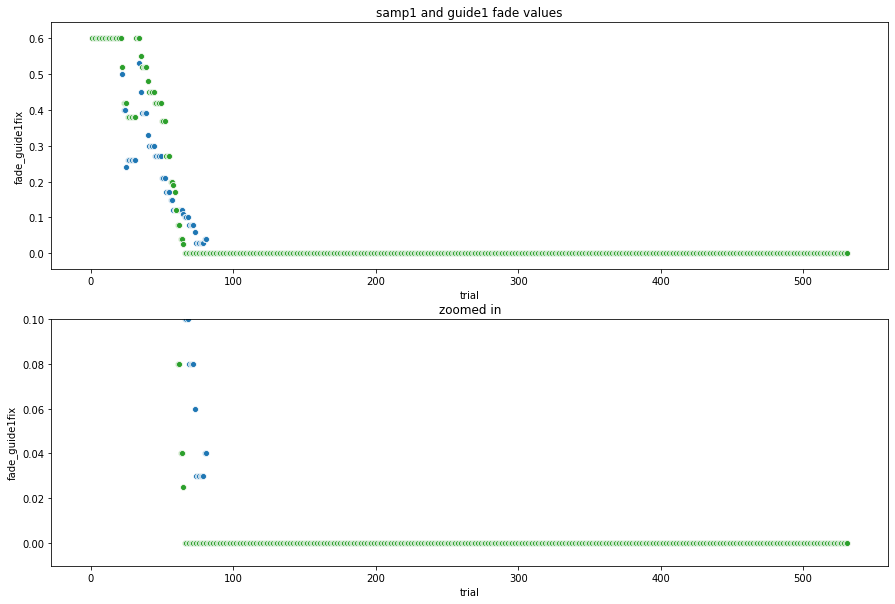

In [5]:
# === plot timeline across all trials, just summarizing things related to copying (fade, etc).
dfthis = df
plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
sns.scatterplot(x = "trial", y="fade_samp1", data=dfthis)
sns.scatterplot(x = "trial", y="fade_guide1task", data=dfthis)
sns.scatterplot(x = "trial", y="fade_guide1fix", data=dfthis)
plt.title("samp1 and guide1 fade values")

plt.subplot(2,1,2)
sns.scatterplot(x = "trial", y="fade_samp1", data=dfthis)
sns.scatterplot(x = "trial", y="fade_guide1task", data=dfthis)
sns.scatterplot(x = "trial", y="fade_guide1fix", data=dfthis)
plt.ylim([-0.01, 0.1])
plt.title("zoomed in")

## BELOW: visualizing drawings. Did not do

In [6]:
if False:
# get Trials basd on block.
    targ = {
        "block":[6]}
    trials_list_all = getIndsTrials(fd, targ, keep_only_if_clean_strokes=True, keep_only_if_go=True)

else:
    # get trials based on fade value
    ALPHA_INVISIBLE = 0.021
    ## === WHICH TRIALS?
    if True:
        # Filter by fade values
        dfthis = df[(df["fade_samp1"]<ALPHA_INVISIBLE) & (df["fade_guide1task"]<ALPHA_INVISIBLE) & (df["fade_guide1fix"]<ALPHA_INVISIBLE)]
        trials_list_all = list(dfthis["trial"].values)

    else:
        # 1) Load into stroke dict
        # -- collect d## FILTER TO FIND GOOD TRIALS, - PLOT THOSE
        # --- for a given set of trials, collect trajectories for all of them
        targ = {
            "blockcategory":[12],
        #     "task_stage":["line"],
        }

        trials_list_all = getIndsTrials(fd, targ, keep_only_if_go=True, keep_only_if_clean_strokes=True)

    ## === only keep trials that success fixation
    T = getIndsTrials(fd, keep_only_if_go=True)

    trials_list_all = [t for t in trials_list_all if t in T]

print("extracted trials list:")
print(trials_list_all)

got 276 total trials
extracted trials list:
[82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 148, 150, 151, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 183, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 209, 210, 212, 213, 215, 216, 217, 218, 219, 220, 221, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 237, 238, 239, 240, 241, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 301, 302, 303, 304, 305, 306, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 327, 328, 329, 333, 334, 335, 336, 337, 338, 339, 503

In [ ]:
# = POSITIVE CONTROL, get trials not fully faded
# get trials based on fade value
ALPHA_INVISIBLE = 0.03
## === WHICH TRIALS?
if True:
    # Filter by fade values
    dfthis = df[(df["fade_samp1"]>ALPHA_INVISIBLE) & (df["fade_guide1task"]>ALPHA_INVISIBLE) & (df["fade_guide1fix"]>ALPHA_INVISIBLE)]
    trials_list_all = list(dfthis["trial"].values)

else:
    # 1) Load into stroke dict
    # -- collect d## FILTER TO FIND GOOD TRIALS, - PLOT THOSE
    # --- for a given set of trials, collect trajectories for all of them
    targ = {
        "blockcategory":[12],
    #     "task_stage":["line"],
    }

    trials_list_all = getIndsTrials(fd, targ, keep_only_if_go=True, keep_only_if_clean_strokes=True)

## === only keep trials that success fixation
T = getIndsTrials(fd, keep_only_if_go=True)

trials_list_all = [t for t in trials_list_all if t in T]

print("extracted trials list:")
print(trials_list_all)

In [7]:
## get only unique triasl

trials_list_all = removeRedundantTrials(fd, trials_list_all)
print(trials_list_all)

THIS NOT OPTIMAL - see notes. is ok if same tasks always occur in direct succession chron order.
started with 206 trials
ended with 185 trials
[83, 84, 85, 86, 87, 88, 94, 95, 96, 97, 98, 99, 103, 104, 105, 106, 107, 108, 109, 110, 111, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 148, 150, 151, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 172, 173, 174, 177, 178, 179, 180, 181, 183, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 209, 210, 212, 213, 215, 216, 217, 218, 219, 221, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 237, 238, 239, 240, 241, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 289, 290, 291, 292, 293, 296, 297, 301, 302, 303, 304, 305, 306, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 327, 328, 329, 335, 336, 337, 338

In [ ]:
# === plot all (or subset) of tasks
rand_subset = None
plotMultTrialsSimple(fd, trials_list_all, zoom=True, rand_subset= rand_subset,
                    strokes_ver = "peanuts", plotver="strokes", only_first_n_strokes=3)

## VISUALIZE tasks, first split into categories based on guide dots.

In [8]:
if True:
    ## new version, using metadata (angles and task categories)
    
    angles = [getTrialsTask(fd, t)["metadat"]["angle"][0][0] for t in trials_list_all]
    categories = [getTrialsTask(fd, t)["metadat"]["category"] for t in trials_list_all]
#     print(angles)
#     print(categories)

    # plot histrogram of angles

    # convert to categories by binning angles
    angle_set = sorted(np.array(list(set(angles))))
    print(angle_set)
    
    cat_by_angle_all = np.digitize(angles, angle_set)
    
else:

    ## *** OLD VERSION, USING (1) guide dots on task and (2) inferring angle based on location of top guide dot.
    ## STOP USING THIS ON 8/16 AND AFTER.
    # [OPTIONAL - JUST TO PLOT DISTRUBVTION OF TOPMOST GUIDE POINTS]

    # === 1) Split into categories
    # base this on the angular position of the topmost guide dot.

    plt.figure()
    t_debug = []
    for t in trials_list_all:
    #     t = 5
        task = getTrialsTask(fd, t)

        gdpos = [int(g[0]-1) for g in task["guide_dot_pos"]]

        x = task["x_before_sketchpad"][0]
        y = task["y_before_sketchpad"][0]
    #     x = task["x"][0]
    #     y = task["y"][0]

        xyguide = np.array([x[gdpos], y[gdpos]]).T

        # get position of dot with largest y
        pos_top_guide = xyguide[np.argmax(xyguide[:,1])]

        if pos_top_guide[0]<0.4 and pos_top_guide[1]<0.52:
            print(t)
            t_debug.append(t)

        plt.plot(pos_top_guide[0], pos_top_guide[1], "ok")

    # center 
    pos_center = [0.45, 0.15/3**(0.5)+0.3]
    plt.plot(pos_center[0], pos_center[1], 'or')
    plt.axis("equal")

    # === 1) Split into categories
    # base this on the angular position of the topmost guide dot.

    dot_pos_all = []
    n_categories = 10;
    for t in trials_list_all:
    #     t = 5
        task = getTrialsTask(fd, t)

        gdpos = [int(g[0]-1) for g in task["guide_dot_pos"]]

        x = task["x_before_sketchpad"][0]
        y = task["y_before_sketchpad"][0]

        xyguide = np.array([x[gdpos], y[gdpos]]).T

        # get position of dot with largest y
        pos_top_guide = xyguide[np.argmax(xyguide[:,1])]

        dot_pos_all.append(pos_top_guide)

    center = [np.mean(np.stack(dot_pos_all)[:,0]), 0.48] 

    # get angle from center
    from pythonlib.tools import vectools as vt
    angles_all = []
    for pos in dot_pos_all:
        angles_all.append(vt.get_angle(pos - center))

    # -- bin all trials into categories based on angles
    from math import pi
    cat_by_angle_all = np.digitize(angles_all, np.linspace(0, pi, n_categories))



[0.7853981633974483, 1.5707963267948966, 2.356194490192345, 3.141592653589793, 3.9269908169872414, 4.71238898038469, 5.497787143782138, 6.283185307179586]


In [ ]:

# ===== plot filtered by category
cat_to_plot = 8


trials_this = [t for t,c in zip(trials_list_all, cat_by_angle_all) if c==cat_to_plot]
print(trials_this)

rand_subset = None
plotMultTrialsSimple(fd, trials_this, zoom=True, rand_subset= rand_subset,
                    strokes_ver = "peanuts", plotver="strokes", only_first_n_strokes=3, plot_fix=False)

## === get all instances for a given category, and plot all.

In [9]:
# 0) Which trials list?
trials_list_all

# 1) collect all data into list of dict
indcenter = 6
DAT = []
for t in trials_list_all:
    DAT.append({
        "angle":getTrialsTask(fd, t)["metadat"]["angle"][0][0],
        "category":getTrialsTask(fd, t)["metadat"]["category"],
        "strokes":getTrialsStrokesByPeanuts(fd, t),
        "centerpos":getTrialsGuideDots(fd, t)[indcenter],
        "strokestask":getTrialsTaskAsStrokes(fd, t),
        "trial":t
        })

# 2) reorder the trials
order_by = "angle"

if order_by=="angle":
    DAT = sorted(DAT, key=lambda x: x["angle"])

    

angle_list = sorted(set([D["angle"] for D in DAT]))
category_list = set([d["category"] for d in DAT])
category_list = list(category_list)


plotting these trials for angle: 0.7853981633974483
[84, 95, 97, 116, 126, 128, 131, 165, 169, 172, 178, 179, 189, 215, 218, 221, 223, 228, 232, 304, 311, 314, 336]
plotting these trials for angle: 1.5707963267948966
[88, 103, 123, 134, 145, 146, 148, 177, 180, 195, 216, 217, 227, 229, 231, 233, 237, 303, 305, 321, 324, 329, 335, 512, 515]
plotting these trials for angle: 2.356194490192345
[98, 105, 111, 117, 119, 121, 124, 132, 133, 151, 162, 166, 173, 316, 320, 322, 337, 338, 505, 506, 510]
plotting these trials for angle: 3.141592653589793
[87, 96, 108, 127, 130, 137, 140, 144, 150, 154, 158, 170, 191, 212, 224, 235, 238, 239, 273, 275, 279, 286, 297, 319, 339, 503, 507, 516]
plotting these trials for angle: 3.9269908169872414
[86, 115, 118, 129, 143, 155, 159, 161, 164, 168, 187, 190, 225, 230, 241, 280, 281, 284, 285, 291, 292, 302, 318, 509]
plotting these trials for angle: 4.71238898038469
[99, 106, 110, 125, 138, 139, 163, 174, 186, 192, 193, 194, 209, 226, 276, 313, 327]
plott

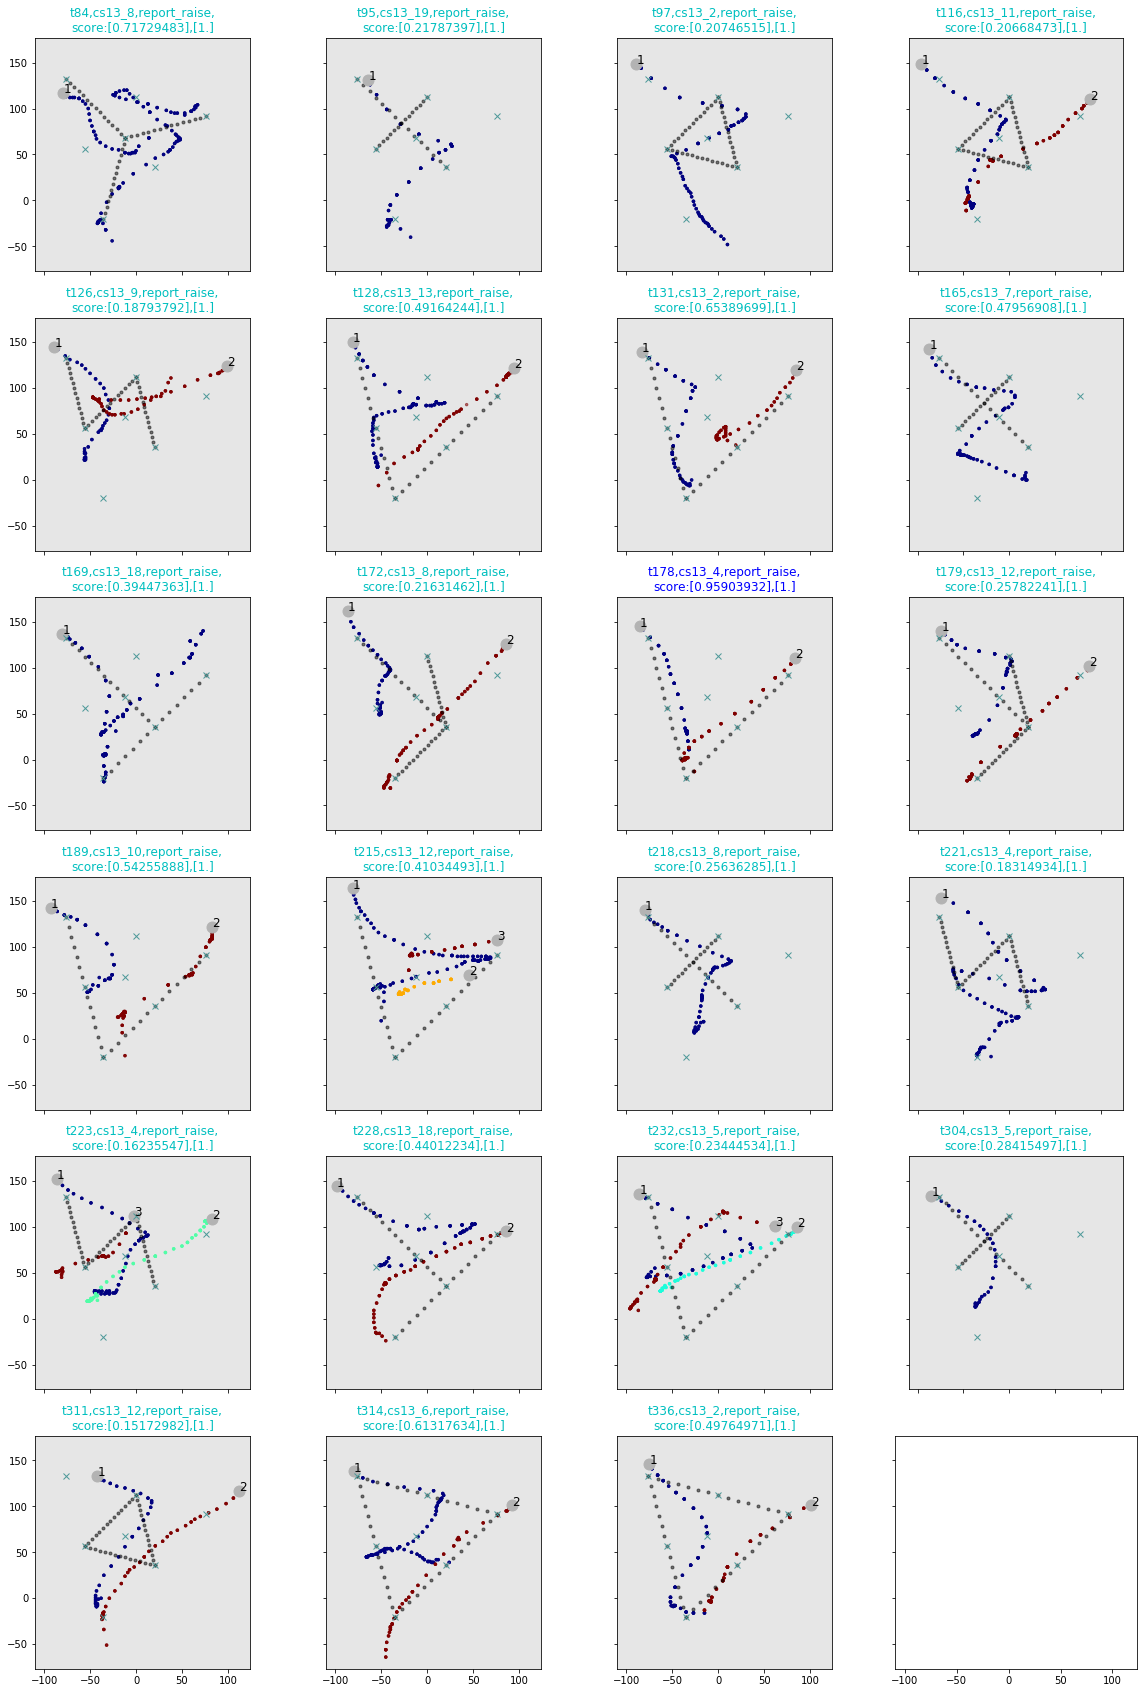

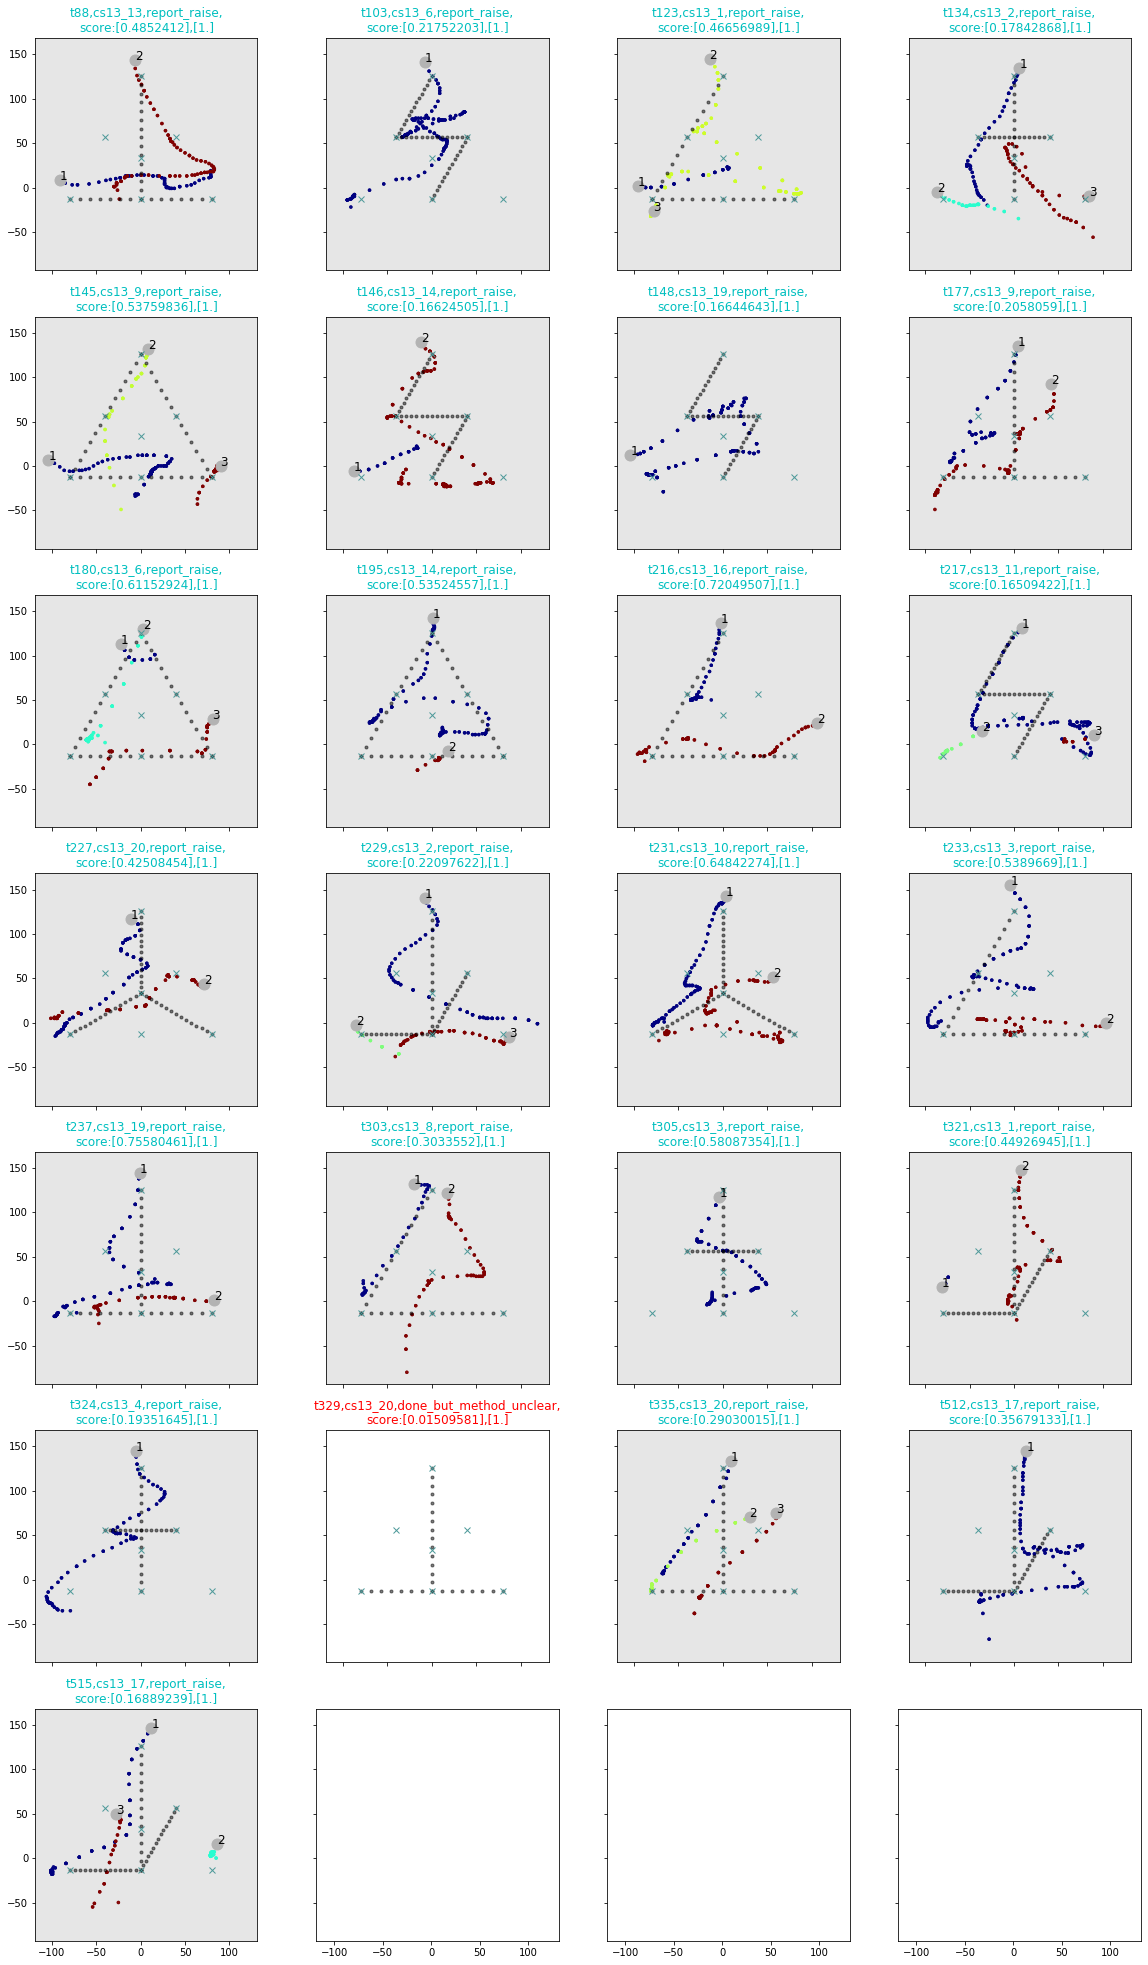

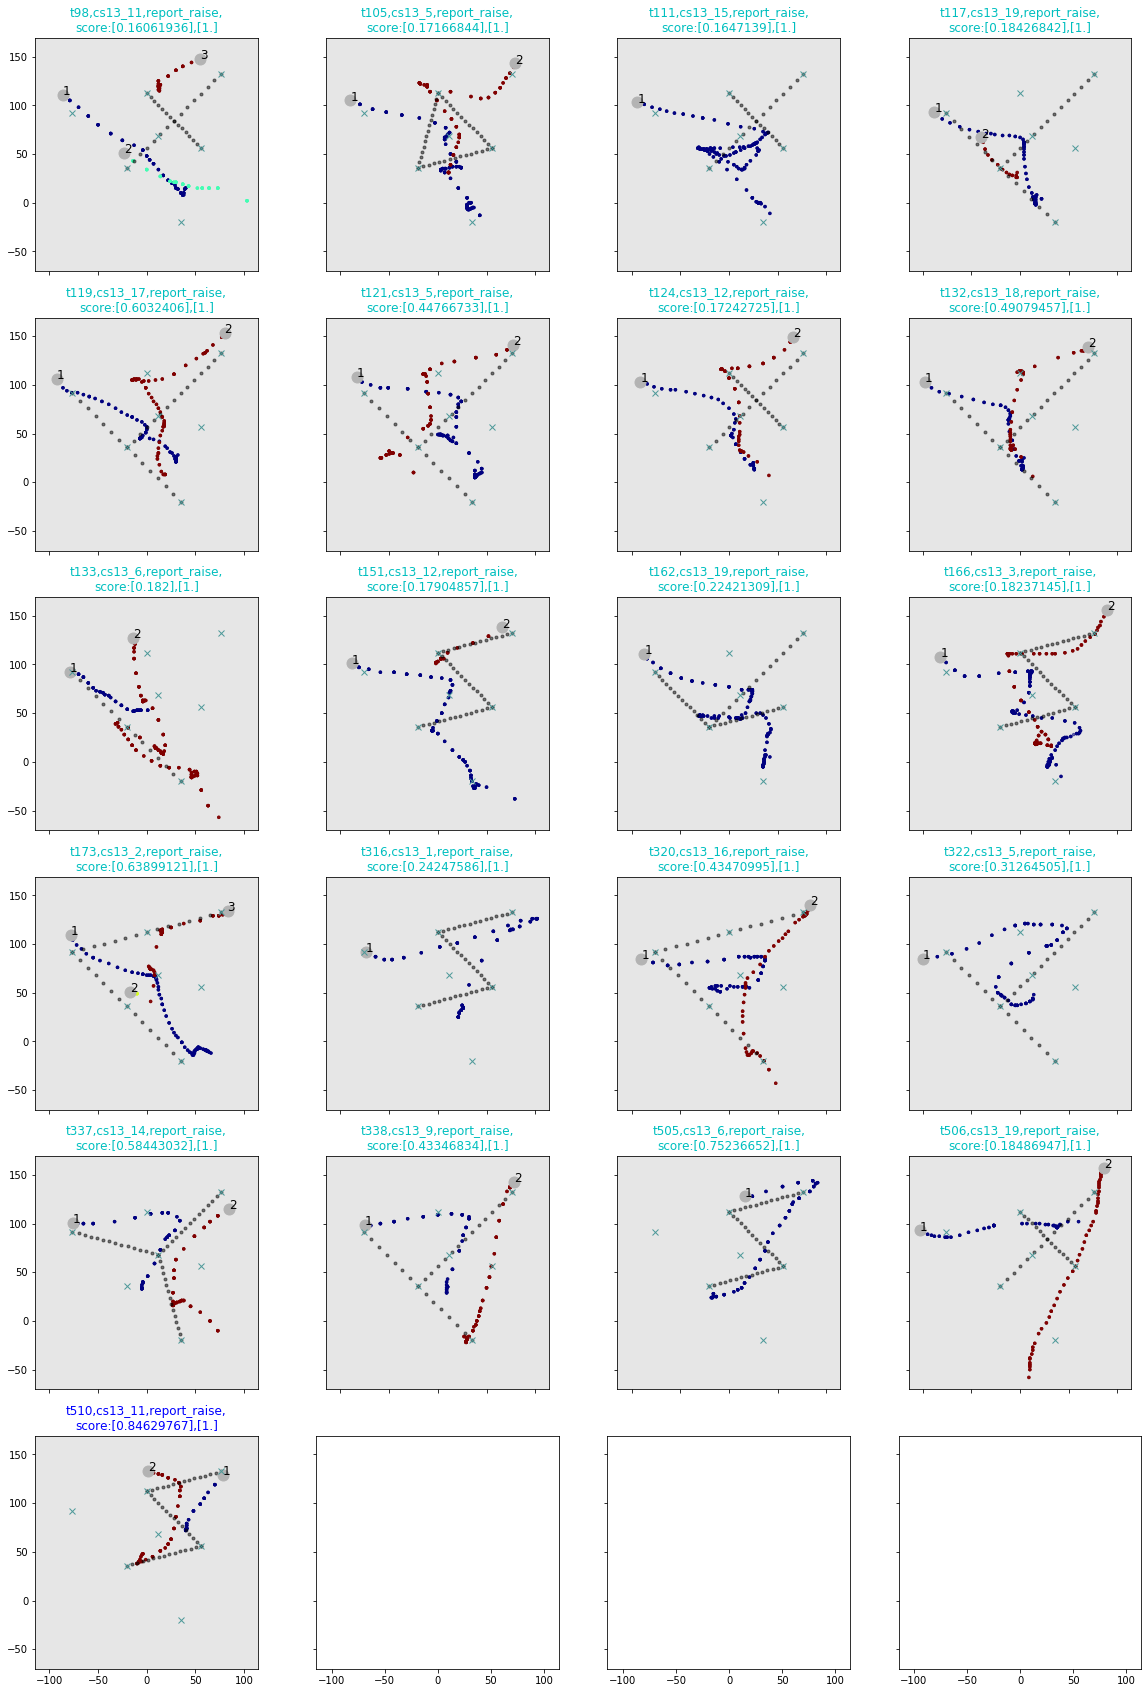

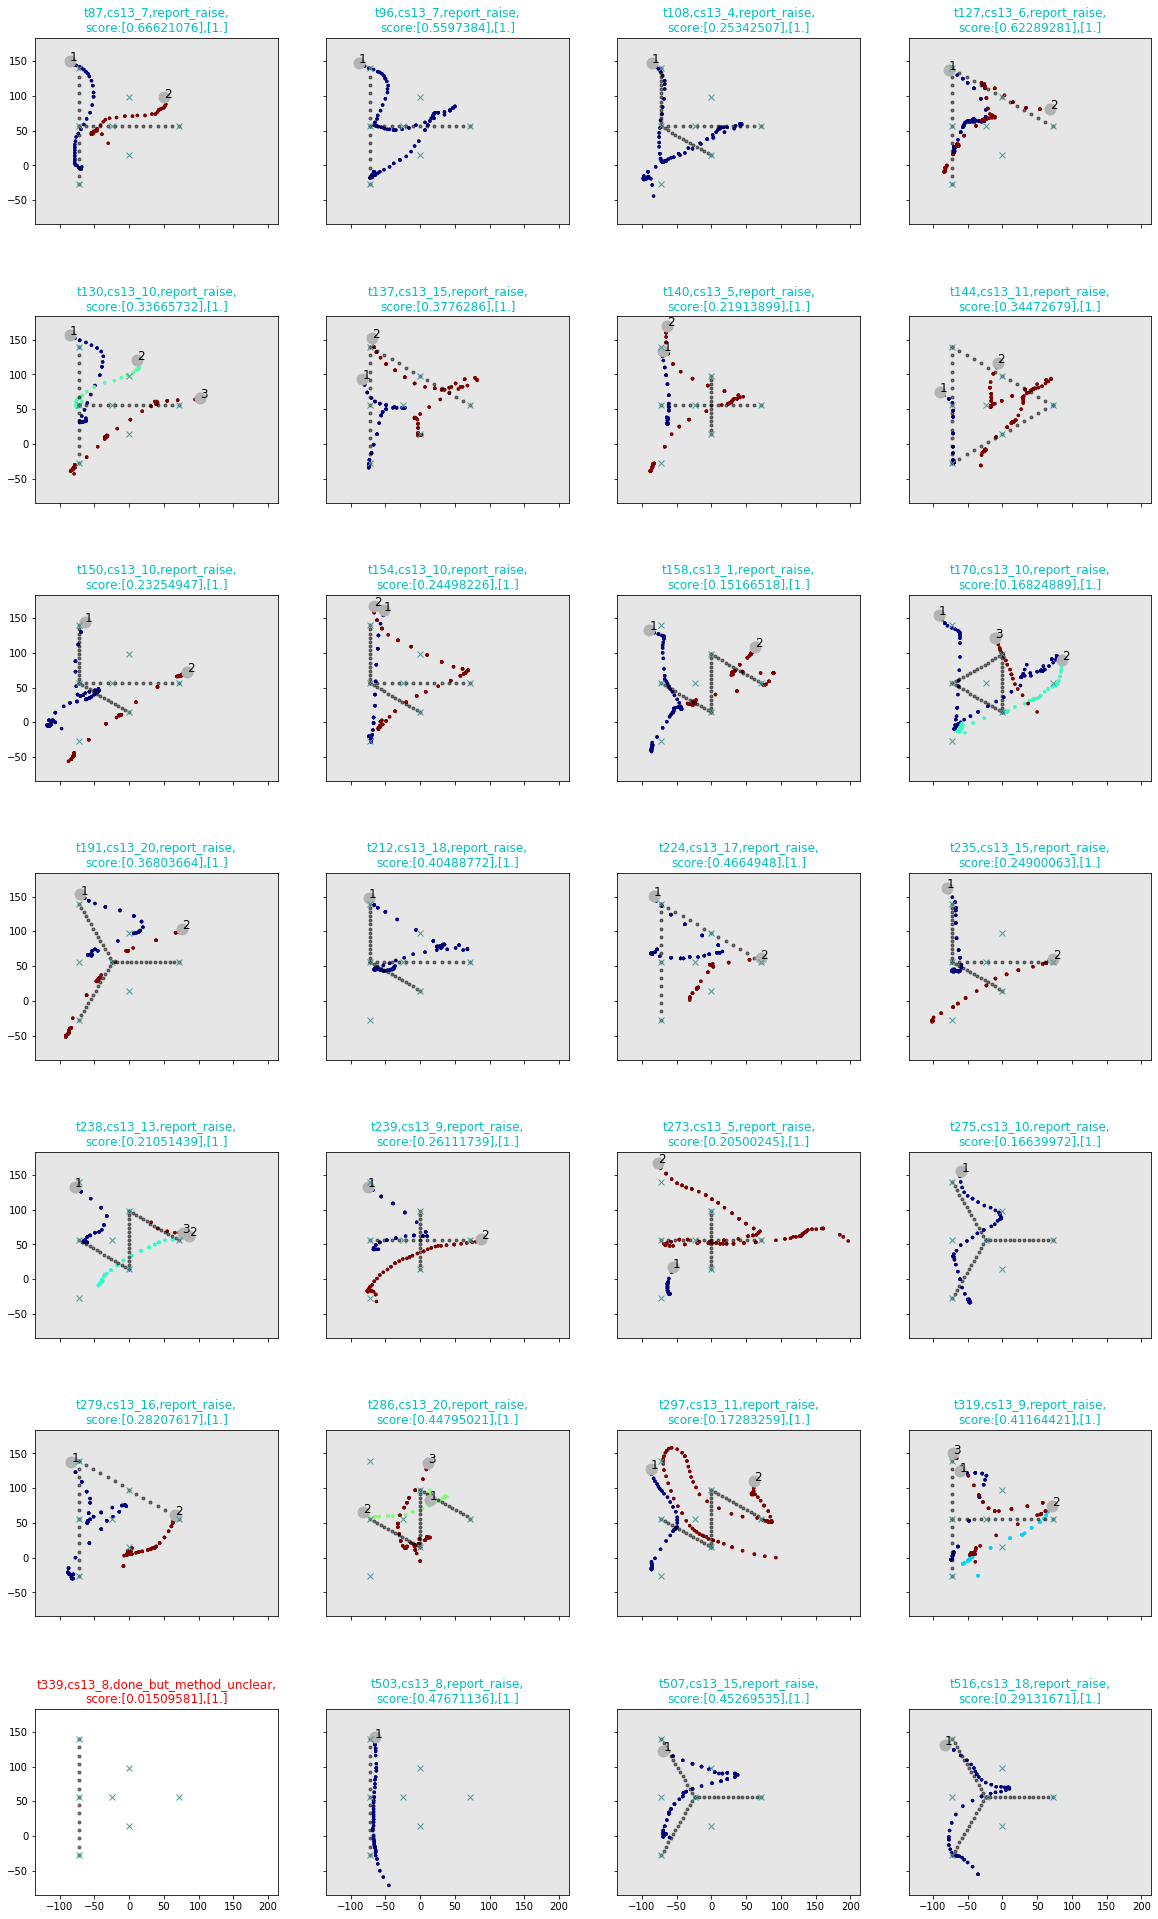

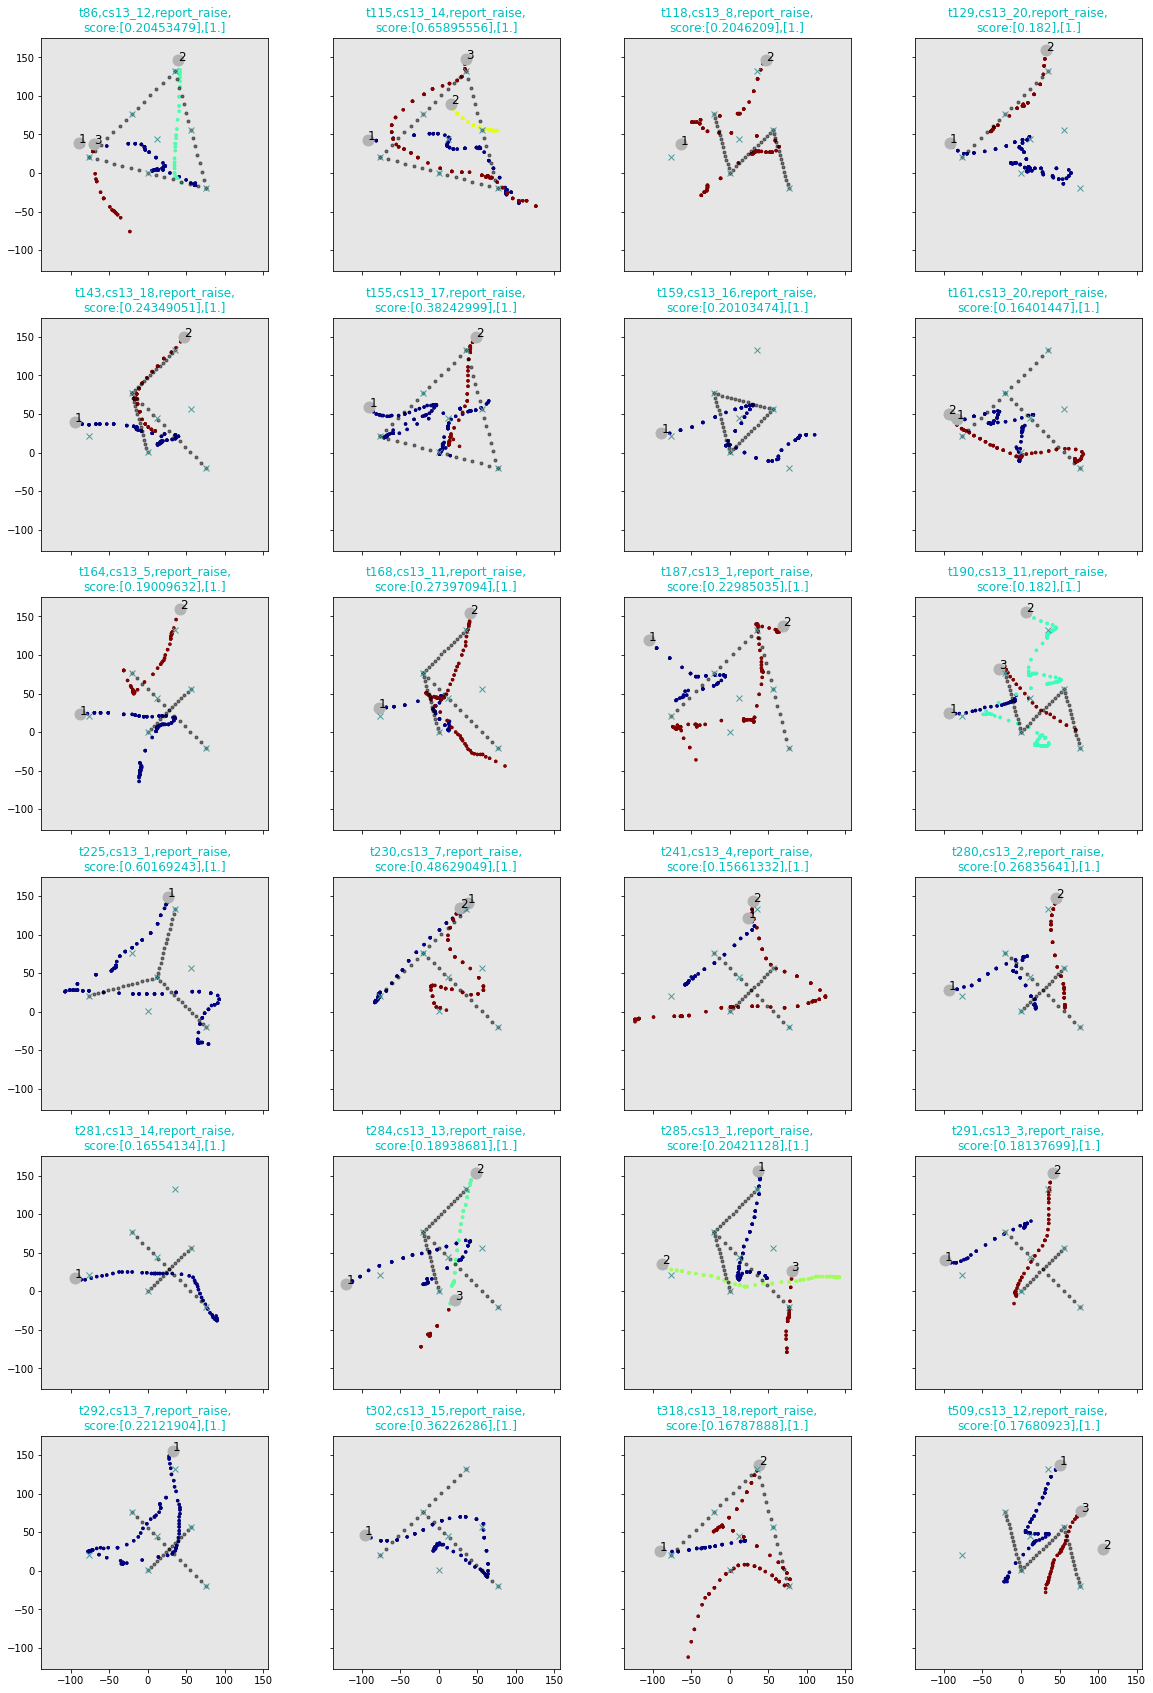

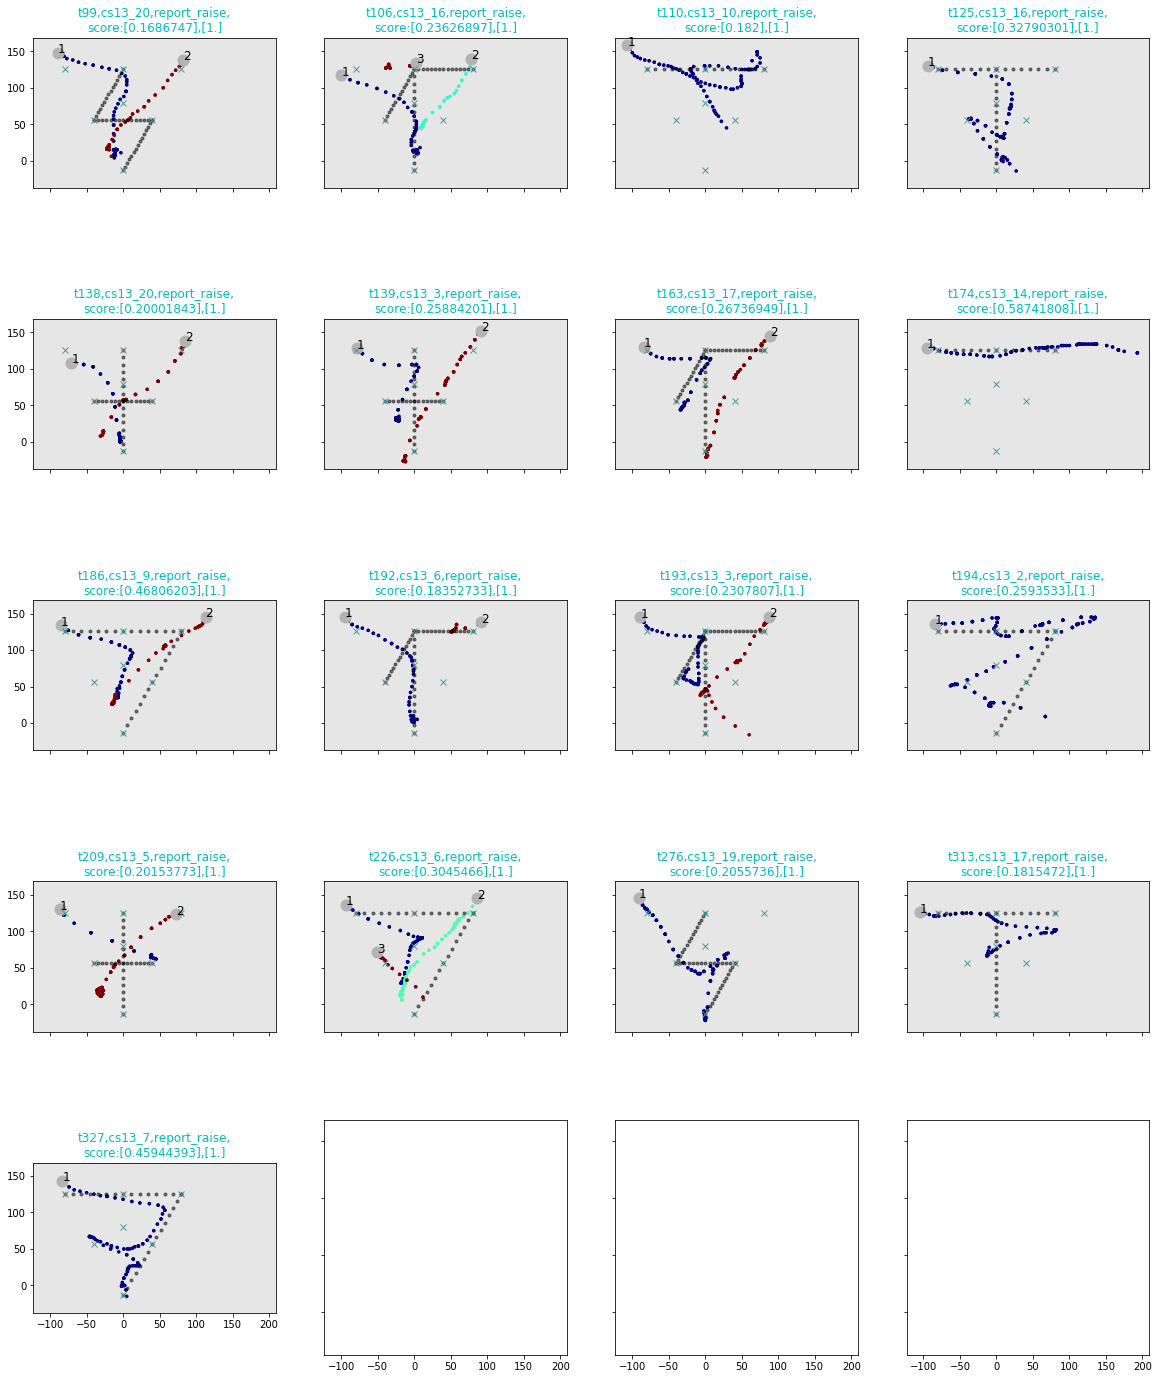

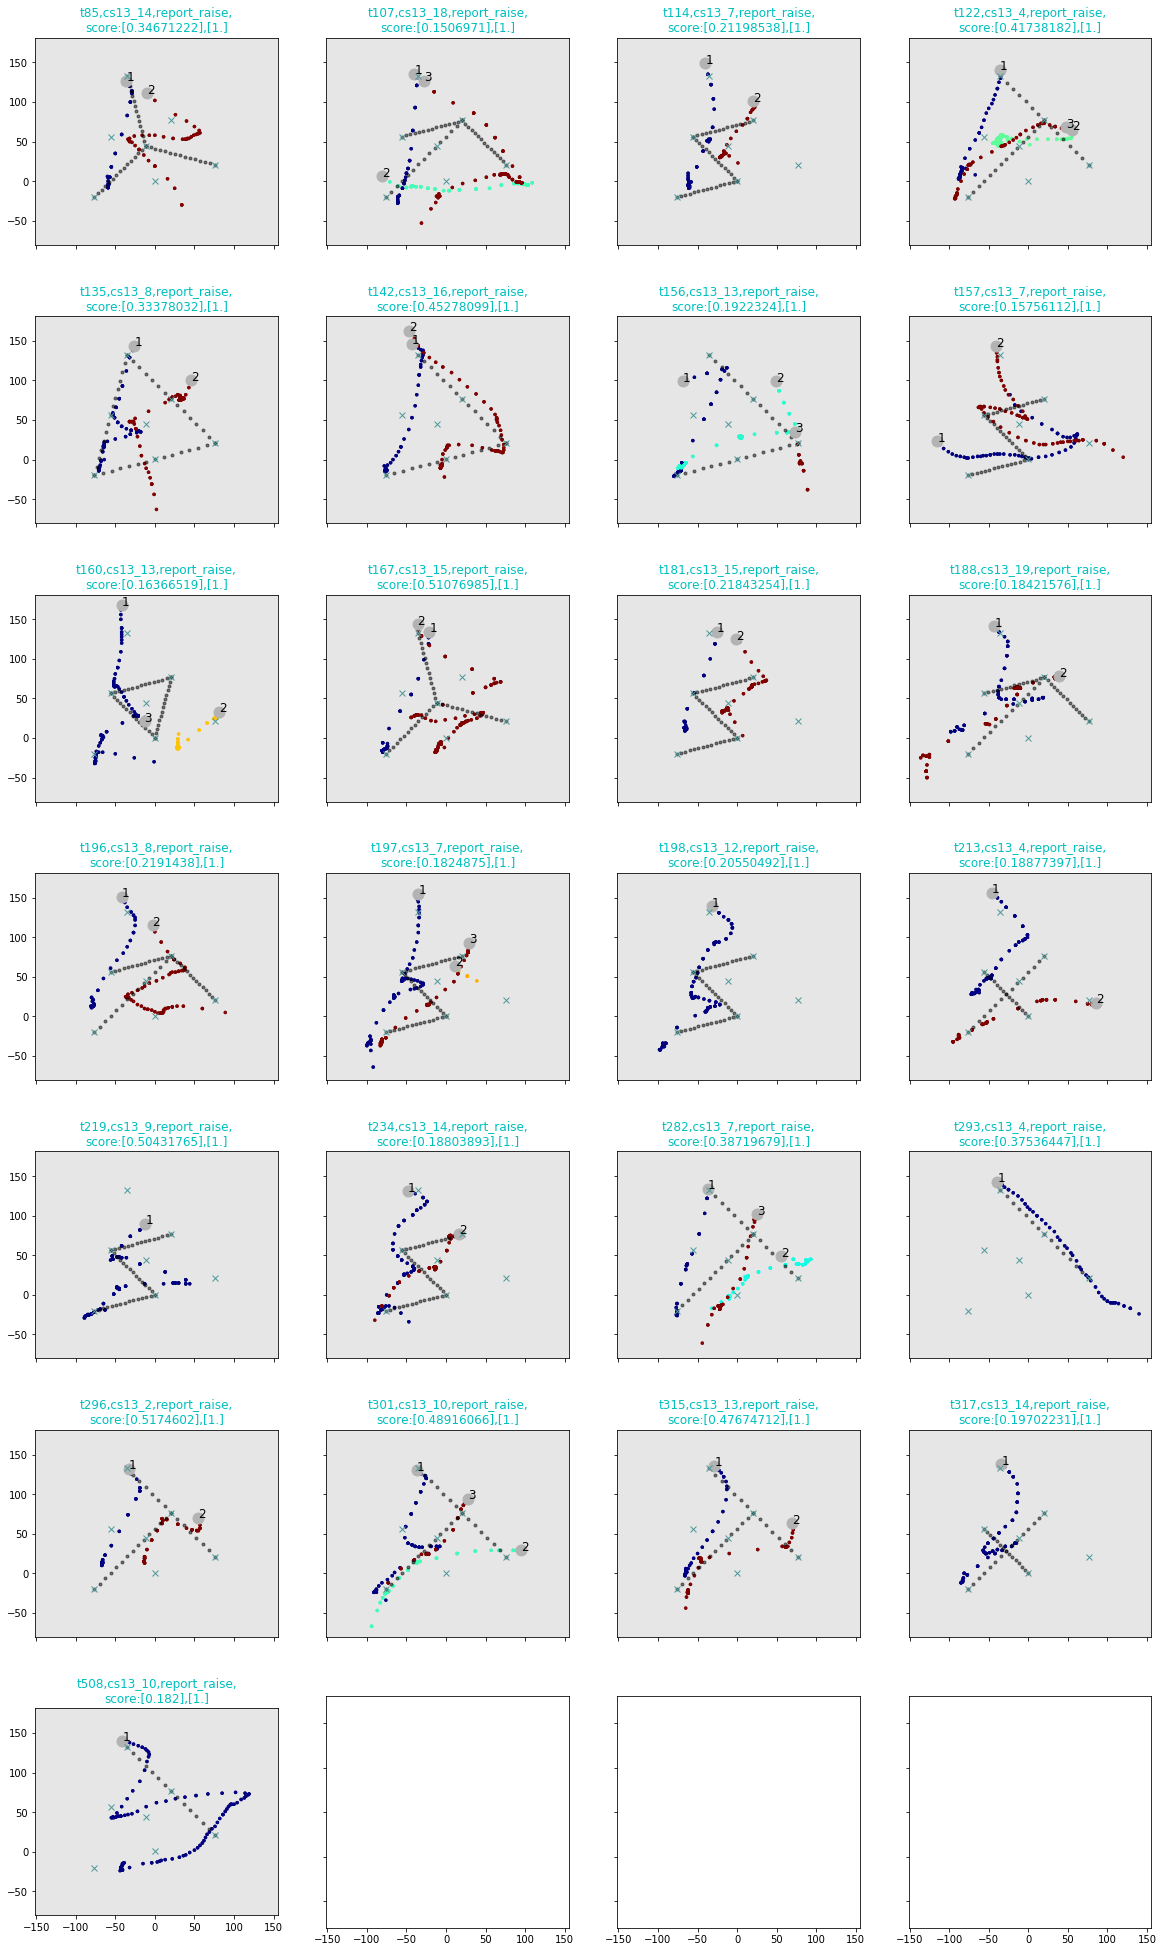

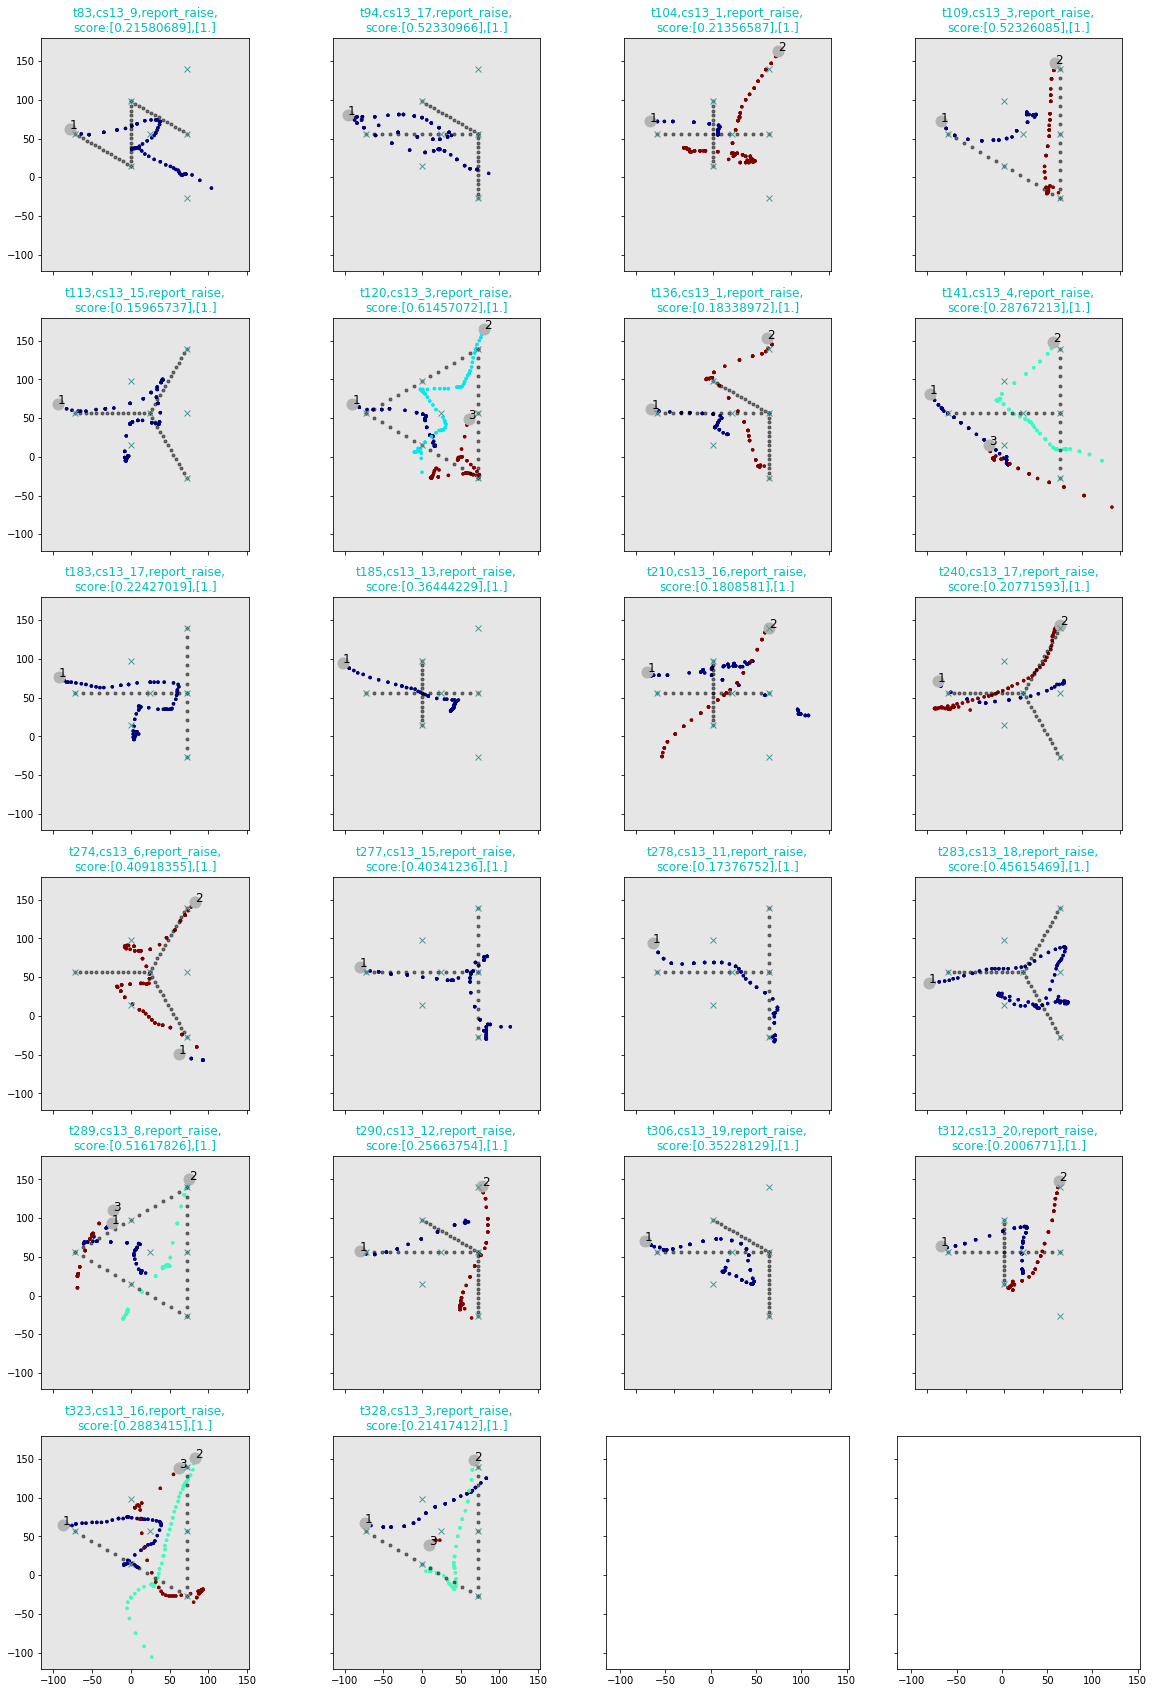

In [10]:
# 2) Plot all behavior, separated by angle

for a in angle_list:
    trials_this = [d["trial"] for d in DAT if d["angle"]==a]
    
    print(f"plotting these trials for angle: {a}")
    print(trials_this)

    rand_subset = None
    plotMultTrialsSimple(fd, trials_this, zoom=True, rand_subset= rand_subset,
                        strokes_ver = "peanuts", plotver="strokes", only_first_n_strokes=3, plot_fix=False)
#     assert FAlse

In [ ]:
# 2) Plot all behavior, separated by category

for c in category_list:
    trials_this = [d["trial"] for d in DAT if d["category"]==c]
    
    print(f"plotting these trials for cateorty: {c}")
    print(trials_this)
        

    rand_subset = None
    plotMultTrialsSimple(fd, trials_this, zoom=True, rand_subset= rand_subset,
                        strokes_ver = "peanuts", plotver="strokes", only_first_n_strokes=3, plot_fix=False)
#     assert FAlse

## thought:
Key comparison is the same guide dots, but different task.
Plot, mean across trials, separated by angle and category (imagine a grid).


In [ ]:
# for each angle and each category, overlay all trials and plot in a grid.
category_list = set([d["category"] for d in DAT])

angle_list = sorted(set([D["angle"] for D in DAT]))
category_list = list(category_list)

fig, axes = plt.subplots(len(angle_list), len(category_list), sharex=True, 
                         sharey=True, figsize=(len(category_list)*5, len(angle_list)*5))

for i, a in enumerate(angle_list):
    for ii, c in enumerate(category_list):
        # find all trials with this a and c
        DATTHIS = [D for D in DAT if D["angle"]==a and D["category"]==c]
        
        # plot each trial on same axis
        ax = axes[i, ii]
        for D in DATTHIS:
            plotTrialSimple(fd, D["trial"], ax, zoom=True, post_go_only=True, 
                           use_peanut_params={"replaynum":None, "active":True}, plotver="randcolor", 
                            only_first_n_strokes=10, plot_fix=False, overlay_guide_dots=False,
                           plot_task_stimulus=False, markersize=9, alpha=0.6)


fig.savefig("/tmp/plot.pdf")

### TO ITERATE OVER EXPERIMENTS


In [ ]:
AD = (
    ("Pancho", 200816, 1),
    ("Pancho", 200817, 1),
    ("Red", 200816, 2),
    ("Red", 200817, 1)
)


from tools.preprocess import *
import seaborn as sns

for animal, date, session in AD:
#     animal = "Pancho"
#     date = 200816
    expt = "pilot"
#     session = 1

    fd = loadSingleData(animal, date, expt, session, resave_as_dict=False, load_resaved_data=True, 
                          resave_overwrite=False)

    ############ START HERE
    df = extractSessionDf(fd)

    for fadestatus in ["faded", "notfaded"]:
        
        ###### GET TRIALS
        if fadestatus=="faded":
            # get trials based on fade value
            ALPHA_INVISIBLE = 0.021
            ## === WHICH TRIALS?
            # Filter by fade values
            dfthis = df[(df["fade_samp1"]<ALPHA_INVISIBLE) & (df["fade_guide1task"]<ALPHA_INVISIBLE) & (df["fade_guide1fix"]<ALPHA_INVISIBLE)]
        elif fadestatus=="notfaded":
            # get trials based on fade value
            ALPHA_INVISIBLE = 0.03
            ## === WHICH TRIALS?
            # Filter by fade values
            dfthis = df[(df["fade_samp1"]>ALPHA_INVISIBLE)]

        trials_list_all = list(dfthis["trial"].values)
        ## === only keep trials that success fixation
        T = getIndsTrials(fd, keep_only_if_go=True)
        trials_list_all = [t for t in trials_list_all if t in T]


        ########################## plot
        # 1) collect all data into list of dict
        indcenter = 6
        DAT = []
        for t in trials_list_all:
            DAT.append({
                "angle":getTrialsTask(fd, t)["metadat"]["angle"][0][0],
                "category":getTrialsTask(fd, t)["metadat"]["category"],
                "strokes":getTrialsStrokesByPeanuts(fd, t),
                "centerpos":getTrialsGuideDots(fd, t)[indcenter],
                "strokestask":getTrialsTaskAsStrokes(fd, t),
                "trial":t
                })

        # 2) reorder the trials
        order_by = "angle"
        if order_by=="angle":
            DAT = sorted(DAT, key=lambda x: x["angle"])


        ################ PLOT GRID
        for plot_example in [True, False]:
            nexamples = 2
            for nstrokes in [1,2,3, 10]:
                
                # =============== PLOT
                # for each angle and each category, overlay all trials and plot in a grid.
                angle_list = sorted(set([D["angle"] for D in DAT]))
                category_list = list(category_list)

                fig, axes = plt.subplots(len(angle_list), len(category_list), sharex=True, 
                                         sharey=True, figsize=(len(category_list)*6, len(angle_list)*6))
                for i, a in enumerate(angle_list):
                    for ii, c in enumerate(category_list):
                        # find all trials with this a and c
                        DATTHIS = [D for D in DAT if D["angle"]==a and D["category"]==c]

                        if plot_example:
                            # then get random subset
                            DATTHIS = random.sample(DATTHIS, min((nexamples, len(DATTHIS))))
                            
                        # plot each trial on same axis
                        ax = axes[i, ii]
                        for j, D in enumerate(DATTHIS):
    #                         plot_task_stimulus = j==0
    #                         plotTrialSimple(fd, D["trial"], ax, zoom=True, post_go_only=True, 
    #                                        use_peanut_params={"replaynum":None, "active":True}, plotver="randcolor", 
    #                                         only_first_n_strokes=nstrokes, plot_fix=False, overlay_guide_dots=True,
    #                                        plot_task_stimulus=plot_task_stimulus, markersize=9, alpha=0.6)
                            plotTrialSimple(fd, D["trial"], ax, zoom=True, post_go_only=True, 
                                           use_peanut_params={"replaynum":None, "active":True}, plotver="randcolor", 
                                            only_first_n_strokes=nstrokes, plot_fix=False, overlay_guide_dots=False,
                                           plot_task_stimulus=False, markersize=9, alpha=0.6)

                fig.savefig(f"/tmp/{animal}_{date}_{session}_{fadestatus}_nstrokes{nstrokes}_example{plot_example}.pdf")

        ### ====== PLOT JUST THE TASKS.
        fig, axes = plt.subplots(len(angle_list), len(category_list), sharex=True, 
                                 sharey=True, figsize=(len(category_list)*6, len(angle_list)*6))
        for i, a in enumerate(angle_list):
            for ii, c in enumerate(category_list):
                # find all trials with this a and c
                DATTHIS = [D for D in DAT if D["angle"]==a and D["category"]==c]

                # plot each trial on same axis
                ax = axes[i, ii]
                for j, D in enumerate(DATTHIS):
                    if j==0:
                        plotTrialSimple(fd, D["trial"], ax, zoom=True, post_go_only=True, 
                                       use_peanut_params={"replaynum":None, "active":True}, plotver="randcolor", 
                                        plot_fix=False, overlay_guide_dots=True, plot_task_stimulus=True, 
                                        markersize=9, alpha=0.6, plot_drawing_behavior=False)

        fig.savefig(f"/tmp/{animal}_{date}_{session}_{fadestatus}_tasks.pdf")
        